# 3. Analysing Customer Churn in a Telecommunications Company
 ● Import the "Telecom_Customer_Churn.csv" dataset.
 ● Handle missing values in the dataset, deciding on an appropriate strategy.
 ● Removeduplicates, check for inconsistencies and standardise (or normalise or
 scale) the data
 ● Convert columns to the correct data types as needed.
 ● Identify and handle outliers in the data.
 ● Perform feature engineering, creating new features that may be relevant to
 predicting customer churn.
 ● Split the dataset into training and testing sets for further analysis.
 ● Export the cleaned dataset for future analysis or modelling.

In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Step 1: Load the Dataset

In [210]:
df=pd.read_csv('TelecomCustomer_Churn.csv')

In [211]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,750.00,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,F,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Step 2: Explore the Dataset

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7037 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7042 non-null   object 
 4   Dependents        7042 non-null   object 
 5   tenure            7038 non-null   float64
 6   PhoneService      7042 non-null   object 
 7   MultipleLines     7041 non-null   object 
 8   InternetService   7040 non-null   object 
 9   OnlineSecurity    7042 non-null   object 
 10  OnlineBackup      7040 non-null   object 
 11  DeviceProtection  7041 non-null   object 
 12  TechSupport       7040 non-null   object 
 13  StreamingTV       7040 non-null   object 
 14  StreamingMovies   7041 non-null   object 
 15  Contract          7038 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [213]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,750.00,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,F,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [214]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [215]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7038.000000,7041.000000,7029.000000
mean,0.162005,32.347826,65.236266,2280.425452
std,0.368481,24.564499,34.563849,2265.763259
min,0.000000,0.000000,10.000000,18.800000
25%,0.000000,9.000000,35.500000,399.600000
50%,0.000000,29.000000,70.350000,1396.000000
75%,0.000000,55.000000,89.850000,3784.000000
max,1.000000,72.000000,750.000000,8684.800000


In [216]:
df.shape

(7043, 21)

### Step 3: Handle Missing Values

In [217]:
df.isnull().sum()

customerID           0
gender               6
SeniorCitizen        0
Partner              1
Dependents           1
tenure               5
PhoneService         1
MultipleLines        2
InternetService      3
OnlineSecurity       1
OnlineBackup         3
DeviceProtection     2
TechSupport          3
StreamingTV          3
StreamingMovies      2
Contract             5
PaperlessBilling     0
PaymentMethod        5
MonthlyCharges       2
TotalCharges        14
Churn                3
dtype: int64

In [218]:
# For numerical columns, fill with median or mean; for categorical, use mode or drop as appropriate
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns

In [219]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Step 4: Remove Duplicates

In [220]:
df[df.duplicated(['customerID'])].T

,14,30,42,60
customerID,9237-HQITU,9237-HQITU,9237-HQITU,9237-HQITU
gender,Female,Female,Female,Female
SeniorCitizen,0,0,0,0
Partner,No,No,No,No
Dependents,No,No,No,No
tenure,2.0,2.0,2.0,2.0
PhoneService,Yes,Yes,Yes,Yes
MultipleLines,No,No,No,No
InternetService,Fiber optic,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,No,No,No


In [221]:
df.drop_duplicates(inplace=True)

In [222]:
df.shape

(7040, 21)

### Step 5: Check for inconsistent data

In [223]:
df['gender'].value_counts()

gender
Male      3549
Female    3467
F           12
M           12
Name: count, dtype: int64

In [224]:
df['gender'] = df['gender'].replace({'F':'Female','M ':'Male'})

In [225]:
df['gender'].value_counts()

gender
Male      3561
Female    3479
Name: count, dtype: int64

In [226]:
# scale numeric data
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [227]:
numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [228]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,-0.439798,Yes,No,-1.277358,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,19.811732,-0.994733,No
1,5575-GNVDE,Male,-0.439798,No,No,0.066768,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,-0.239672,-0.173116,No
2,3668-QPYBK,Male,-0.439798,No,No,-1.236627,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,-0.329361,-0.960139,Yes
3,7795-CFOCW,Male,-0.439798,No,No,0.514810,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.663527,-0.194655,No
4,9237-HQITU,Female,-0.439798,No,No,-1.236627,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,0.158145,-0.940920,Yes


### Step 6: Convert Columns to Appropriate Data Types

In [229]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [230]:
df[['tenure','MonthlyCharges','TotalCharges']] = df[['tenure','MonthlyCharges','TotalCharges']].astype('int64')

In [231]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges        int64
TotalCharges          int64
Churn                object
dtype: object

### Step 7: Identify and Handle Outliers

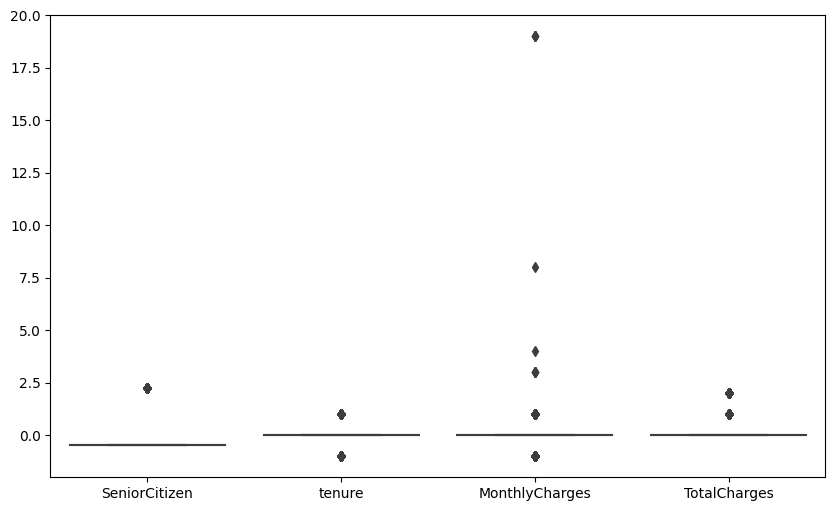

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

In [233]:
numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [234]:
# Using IQR methods for numeric columns
features=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

<Axes: >

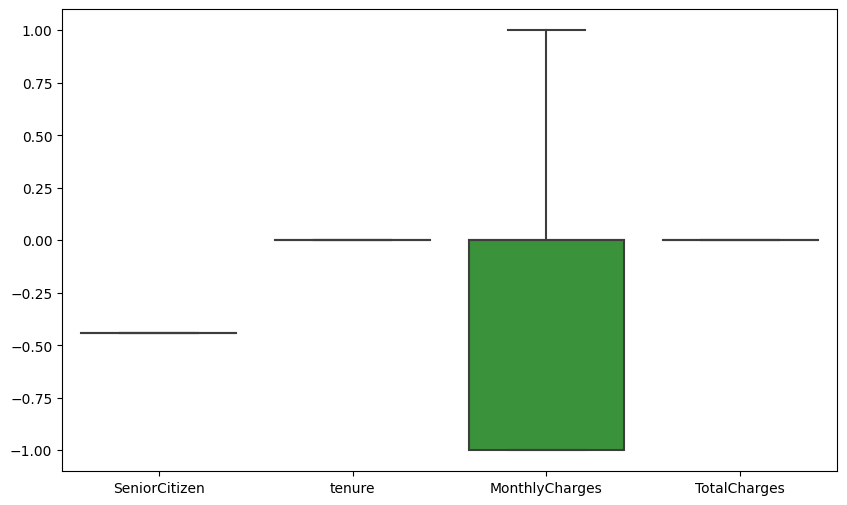

In [235]:
plt.figure(figsize=(10,6))
sns.boxplot(df)

### Step 8: Feature Engineering

In [236]:
df['early_churn'] = (df['tenure'] <= 12) & (df['Churn'] == 'Yes')

In [237]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,early_churn
1,5575-GNVDE,Male,-0.439798,No,No,0,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,0,0,No,False
3,7795-CFOCW,Male,-0.439798,No,No,0,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),0,0,No,False
5,9305-CDSKC,Female,-0.439798,No,No,0,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,0,0,Yes,True
6,1452-KIOVK,Male,-0.439798,No,Yes,0,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0,0,No,False
7,6713-OKOMC,Female,-0.439798,No,No,0,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,-1,0,No,False


### Step 9: Split the Dataset for Training and Testing

In [238]:
x=df.drop(columns=['Churn'])
y=df['Churn']

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)

### Step 10: Export the Cleaned Dataset

In [82]:
df.to_csv('Cleaned_Telecom_Customer_Churn.csv')